#MOVIE DATA CLEANING AND VISUALIZATION

In [1]:
# @title importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import re

In [4]:
# @title Loading the dataset

In [5]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [7]:
# @title  Saving the data a DataFrame

In [8]:
movies_df = pd.read_csv(io.BytesIO(uploaded['movies.csv']))

# Data Pre processing

Understanding the Dataset ( Data Pre-processing )

Understanding the Dataset gives me more insight about the dataset. It furthers helps one to know if there are any anomalies in the dataset such as

Missing data in the record
Inconsitency with the name formating
presence of special characters and symbols that might not be needed
Removing duplicates
This will aassists in generating the insights of the data while trying to answer the following questions

Top Genre
Top movies by rating
Top movies by like or star
Most sorted actors/actresses
Top Directors

In [9]:
# @title Viewing the first five of the data

In [10]:
movies_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [ ]:
# @title Viewing the datatype and structure of the dataset

The info() give us more information and helps us to understand and the datatype in eah column, if there are any misssing data and the total number of entries, each column name

In [11]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


1. From the dataaet the column names are not consistent, some are in capital letter while others are sentence case.

2. And also, there are missing values in the data

In [ ]:
# @title Getting the total number of columns in the data

In [12]:
movies_df.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

In [13]:
movies_df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [14]:
# @title Checking for Empty or null values

In [16]:
movies_df.isna().sum()

,0
MOVIES,0
YEAR,644
GENRE,80
RATING,1820
ONE-LINE,0
STARS,0
VOTES,1820
RunTime,2958
Gross,9539


#Data Cleaning / Wrangling

In [17]:
# @title 1 Renamaing all column names because it is not consistent

In [18]:
movies_df = movies_df.rename(columns={'MOVIES': 'Movies','YEAR': 'Year', 'RATING': 'Rating','ONE-LINE':'One-line','STARS':'Stars','VOTES':'Votes','RunTime':'RunTime','GENRE':'Genre'})


In [20]:
# @title viewing the changes
movies_df.columns

Index(['Movies', 'Year', 'Genre', 'Rating', 'One-line', 'Stars', 'Votes',
       'RunTime', 'Gross'],
      dtype='object')

In [21]:
# @title 2. Removing unwanted column

In [22]:
movies_df2 = movies_df.drop(['One-line','Stars'], axis=1)

In [23]:
movies_df2.head()

,Movies,Year,Genre,Rating,Votes,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,"17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,"885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,"414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,NaN,NaN,NaN


In [24]:
# @title 3. Removing the rows with  NAN to avoid biases as they are much and there are possiblility of nit working with the actual data

In [25]:
movies_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Movies   9999 non-null   object 
 1   Year     9355 non-null   object 
 2   Genre    9919 non-null   object 
 3   Rating   8179 non-null   float64
 4   Votes    8179 non-null   object 
 5   RunTime  7041 non-null   float64
 6   Gross    460 non-null    object 
dtypes: float64(2), object(5)
memory usage: 546.9+ KB


In [26]:
movies_df2= movies_df2.dropna()

In [27]:
movies_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 77 to 6292
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Movies   460 non-null    object 
 1   Year     460 non-null    object 
 2   Genre    460 non-null    object 
 3   Rating   460 non-null    float64
 4   Votes    460 non-null    object 
 5   RunTime  460 non-null    float64
 6   Gross    460 non-null    object 
dtypes: float64(2), object(5)
memory usage: 28.8+ KB


In [28]:
movies_df2.head()

,Movies,Year,Genre,Rating,Votes,RunTime,Gross
77,The Hitman's Bodyguard,(2017),"\nAction, Comedy, Crime",6.9,"205,979",118.0,$75.47M
85,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,"897,444",127.0,$402.45M
95,Don't Breathe,(2016),"\nCrime, Horror, Thriller",7.1,"237,601",88.0,$89.22M
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"\nAction, Adventure, Drama",8.8,"1,713,028",178.0,$315.54M
125,Escape Room,(I) (2019),"\nAction, Adventure, Horror",6.4,"99,351",99.0,$57.01M


In [ ]:
#@title Extracting special character or symbol

A fuction called extracting special characters was used to loop throuhg the dataset, while excluding the Rating and Rut Time column as they are of type integer.

This function was used to remove special charaacters from each column

In [30]:
def clean_text(text):
    if isinstance(text, str):
        # Encode to ASCII, ignoring non-ASCII characters, then decode back to string
        text = text.encode('ascii', 'ignore').decode('ascii')
        # Remove special characters except for commas and spaces
        text = re.sub(r'[^\w\s,]', '', text)
        # Remove extra whitespace and newline characters
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return text

# Assuming 'movies_df2' is your DataFrame
movies_df3 = movies_df2.applymap(clean_text)

<ipython-input-30-3b860073be44>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  movies_df3 = movies_df2.applymap(clean_text)


In [32]:
movies_df3.head()

,Movies,Year,Genre,Rating,Votes,RunTime,Gross
77,The Hitmans Bodyguard,2017,"Action, Comedy, Crime",6.9,"205,979",118.0,7547M
85,Jurassic Park,1993,"Action, Adventure, SciFi",8.1,"897,444",127.0,40245M
95,Dont Breathe,2016,"Crime, Horror, Thriller",7.1,"237,601",88.0,8922M
111,The Lord of the Rings The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,"1,713,028",178.0,31554M
125,Escape Room,I 2019,"Action, Adventure, Horror",6.4,"99,351",99.0,5701M


In [33]:
# Function to clean the 'Gross' column
def clean_columns(value):
    if pd.isna(value):
        return np.nan
    else:
        # Remove dollar sign and commas, then convert to float before integer
        return int(float(value.replace('$', '').replace(',', '').replace('M', '')))

# Apply the cleaning function to the 'Gross' column
movies_df3['Gross'] =movies_df3['Gross'].apply(clean_columns)


#Applying the cleaning function to the Votes Column
movies_df3['Votes'] =movies_df3['Votes'].apply(clean_columns)


In [34]:
movies_df3.head()

,Movies,Year,Genre,Rating,Votes,RunTime,Gross
77,The Hitmans Bodyguard,2017,"Action, Comedy, Crime",6.9,205979,118.0,7547
85,Jurassic Park,1993,"Action, Adventure, SciFi",8.1,897444,127.0,40245
95,Dont Breathe,2016,"Crime, Horror, Thriller",7.1,237601,88.0,8922
111,The Lord of the Rings The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,1713028,178.0,31554
125,Escape Room,I 2019,"Action, Adventure, Horror",6.4,99351,99.0,5701


In [41]:
# @title Rounding the Votes into the nearest whole number
movies_df3['Votes'] = movies_df3['Votes'].astype(float).round().astype(int)

In [43]:
def remove_roman_numerals(text):
    if isinstance(text, str):
        # Remove Roman numerals using a regular expression
        text = re.sub(r'\b[IVX]+\b', '', text).strip()
        return text
    return text

# Apply the function to the 'Movies' column
movies_df3['Year'] = movies_df3['Year'].apply(remove_roman_numerals)

In [44]:
movies_df3.head()

,Movies,Year,Genre,Rating,Votes,RunTime,Gross
77,The Hitmans Bodyguard,2017,"Action, Comedy, Crime",6.9,205979,118.0,7547
85,Jurassic Park,1993,"Action, Adventure, SciFi",8.1,897444,127.0,40245
95,Dont Breathe,2016,"Crime, Horror, Thriller",7.1,237601,88.0,8922
111,The Lord of the Rings The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,1713028,178.0,31554
125,Escape Room,2019,"Action, Adventure, Horror",6.4,99351,99.0,5701


In [45]:
gross_values = movies_df3['Year'].tolist()
print(gross_values)

['2017', '1993', '2016', '2001', '2019', '1975', '2006', '2014', '2017', '2000', '2003', '2006', '2017', '2019', '2012', '1995', '2017', '2015', '2015', '2019', '2003', '2017', '2002', '2019', '2016', '1976', '1978', '2018', '2017', '2016', '2001', '2018', '2017', '2015', '2002', '2001', '2018', '2017', '1968', '2016', '2017', '1978', '2011', '2004', '2011', '2013', '2014', '2016', '2019', '1978', '2008', '2017', '2016', '2019', '2018', '2017', '2013', '2012', '2016', '2017', '2012', '2011', '2006', '1971', '2013', '1989', '1998', '2014', '2017', '2014', '2015', '2004', '2013', '1997', '2017', '2016', '2010', '2016', '2015', '1997', '2018', '2016', '2016', '2013', '1968', '2017', '2013', '2016', '1997', '1996', '2018', '2013', '1993', '2018', '2018', '1980', '2011', '2016', '1975', '2019', '2017', '2011', '2012', '2001', '2013', '2009', '2017', '2015', '2010', '2012', '2019', '1962', '1996', '1991', '2016', '2009', '2010', '2001', '2017', '2012', '1984', '2015', '2019', '2015', '2016',

In [47]:
# @title Convert Year to integer
movies_df3['Year'] = movies_df3['Year'].astype(int)

In [49]:
movies_df3.head(10)

,Movies,Year,Genre,Rating,Votes,RunTime,Gross
77,The Hitmans Bodyguard,2017,"Action, Comedy, Crime",6.9,205979,118.0,7547
85,Jurassic Park,1993,"Action, Adventure, SciFi",8.1,897444,127.0,40245
95,Dont Breathe,2016,"Crime, Horror, Thriller",7.1,237601,88.0,8922
111,The Lord of the Rings The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,1713028,178.0,31554
125,Escape Room,2019,"Action, Adventure, Horror",6.4,99351,99.0,5701
128,Jaws,1975,"Adventure, Thriller",8.0,558731,124.0,26000
132,The Departed,2006,"Crime, Drama, Thriller",8.5,1227522,151.0,13238
143,Gone Girl,2014,"Drama, Mystery, Thriller",8.1,895888,149.0,16777
144,Jumanji Welcome to the Jungle,2017,"Action, Adventure, Comedy",6.9,337900,119.0,40452
145,American Psycho,2000,"Comedy, Crime, Drama",7.6,517014,101.0,1507


#We have gotten our Clean Dataset now we convert and save the result back to the local machine

In [50]:
clean_movie_data =movies_df3

In [52]:
movies_df3.to_csv('clean_movie_data.csv', index=False)
files.download('clean_movie_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Exploratory Data Analysis

In [53]:
clean_movie_data.head()

,Movies,Year,Genre,Rating,Votes,RunTime,Gross
77,The Hitmans Bodyguard,2017,"Action, Comedy, Crime",6.9,205979,118.0,7547
85,Jurassic Park,1993,"Action, Adventure, SciFi",8.1,897444,127.0,40245
95,Dont Breathe,2016,"Crime, Horror, Thriller",7.1,237601,88.0,8922
111,The Lord of the Rings The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,1713028,178.0,31554
125,Escape Room,2019,"Action, Adventure, Horror",6.4,99351,99.0,5701


##Top 10 Genre

In [54]:
# Set the plot style
sns.set(style="whitegrid")

<ipython-input-55-81ed8e4a8432>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genre.values, y=top_genre.index, palette="viridis")


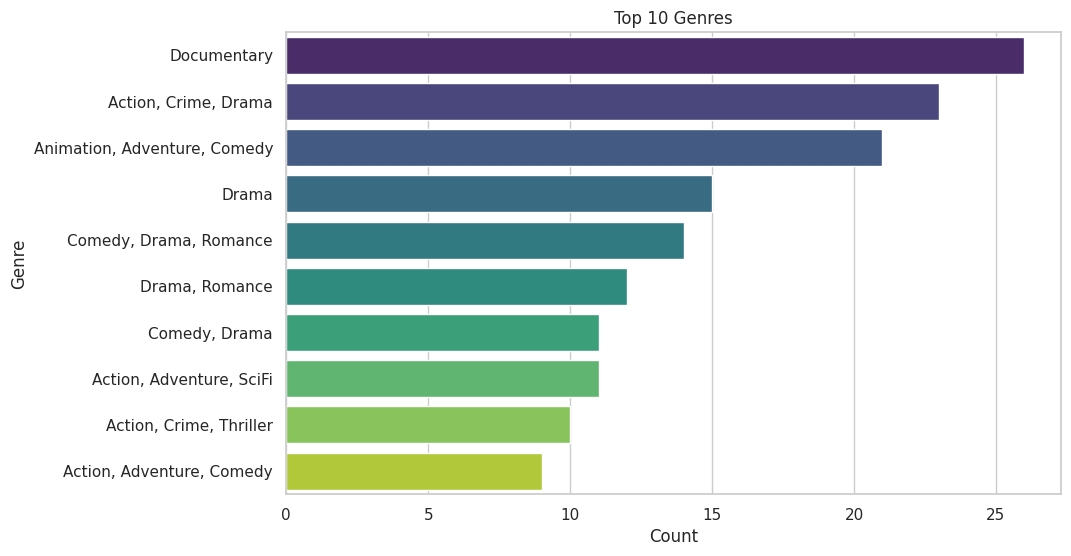

In [55]:
top_genre = clean_movie_data['Genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genre.values, y=top_genre.index, palette="viridis")
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

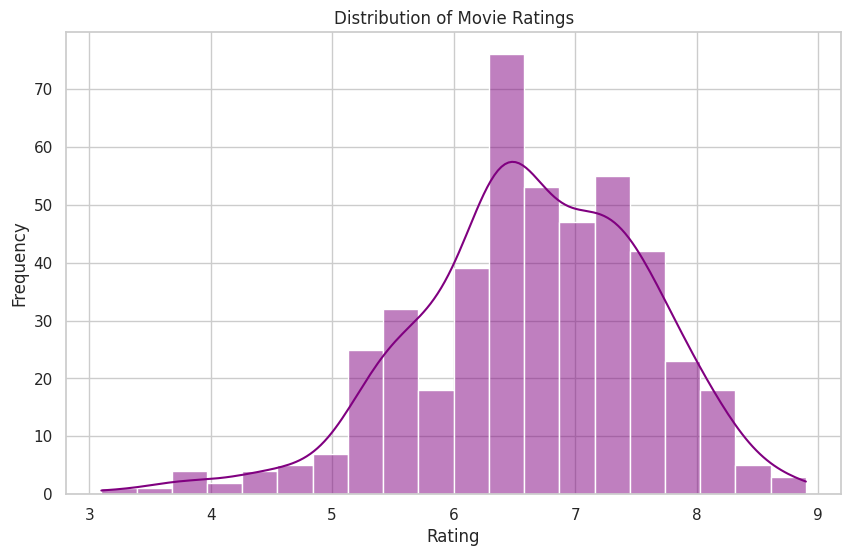

In [56]:
# @title Top Movies by Rating

plt.figure(figsize=(10, 6))
sns.histplot(clean_movie_data['Rating'], bins=20, kde=True, color='purple')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

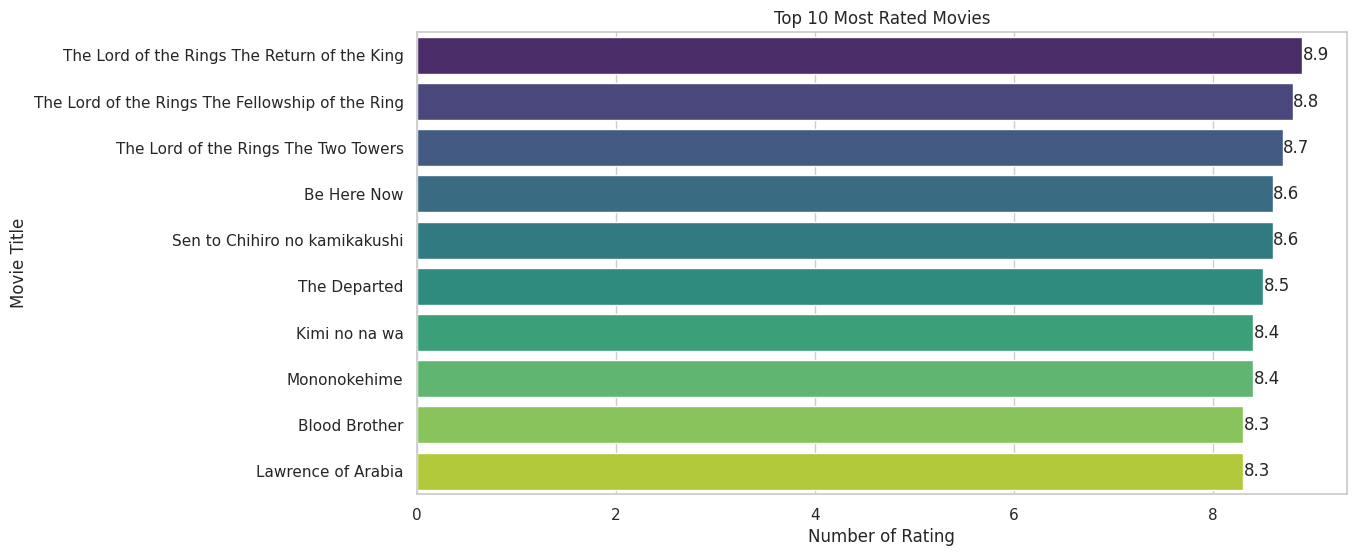

In [57]:
# @title Top 10 Movie Genres by Rating
top_voted_movies = clean_movie_data.sort_values('Rating', ascending=False).head(10)

# Get unique movie titles for categories
unique_movie_titles = top_voted_movies['Movies'].unique()

# Convert 'Movies' to a categorical type with the order based on the sorted votes
top_voted_movies['Movies'] = pd.Categorical(top_voted_movies['Movies'], categories=unique_movie_titles, ordered=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Rating', y='Movies', data=top_voted_movies, hue='Movies', palette='viridis', legend=False)

plt.title('Top 10 Most Rated Movies') # Changed title to reflect votes
plt.xlabel('Number of Rating') # Changed x-axis label to reflect votes
plt.ylabel('Movie Title')

# Add labels with the count of releases on the bars
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'),
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.show()

<ipython-input-58-60aa455f9d53>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Movies', x='Votes', data= highest_vote, palette='viridis')


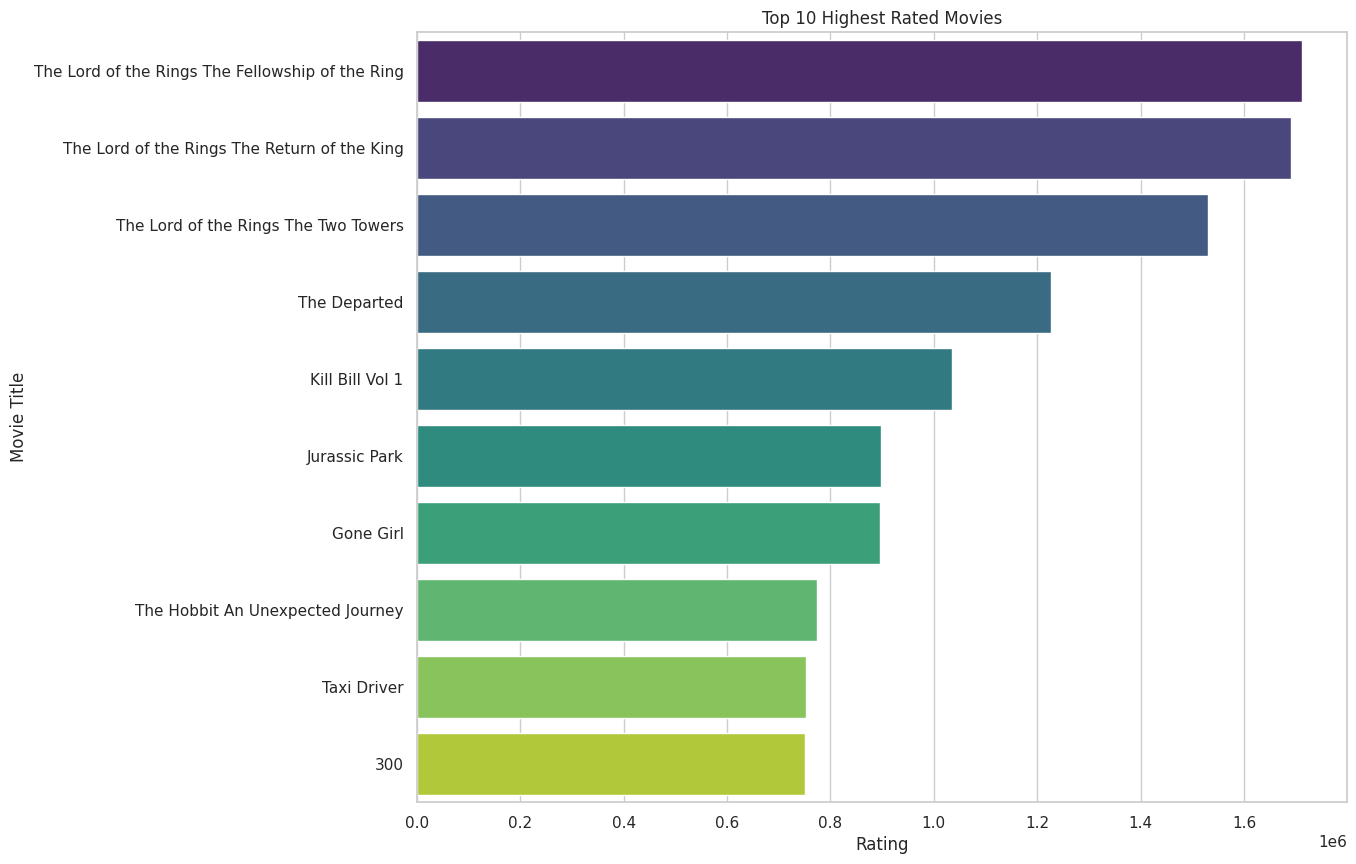

In [58]:
# @title Movies with the highest Votes

highest_vote = clean_movie_data.sort_values('Votes', ascending=False).head(10)

plt.figure(figsize=(12, 10))
sns.barplot(y='Movies', x='Votes', data= highest_vote, palette='viridis')
plt.title('Top 10 Highest Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.show()

<ipython-input-59-19e051943760>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_years.index, y=top_years.values, palette="viridis")


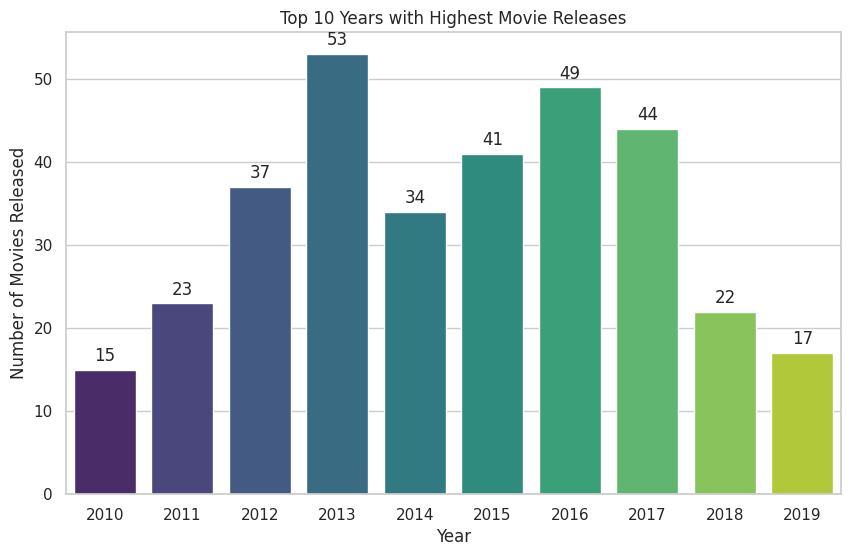

In [59]:
# @title Most release year

top_years = clean_movie_data['Year'].value_counts().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_years.index, y=top_years.values, palette="viridis")

plt.title('Top 10 Years with Highest Movie Releases')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')

# Add labels with the count of releases on the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

<ipython-input-63-5e5b1e6ebb85>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres_2013.values, y=top_10_genres_2013.index, palette="viridis")


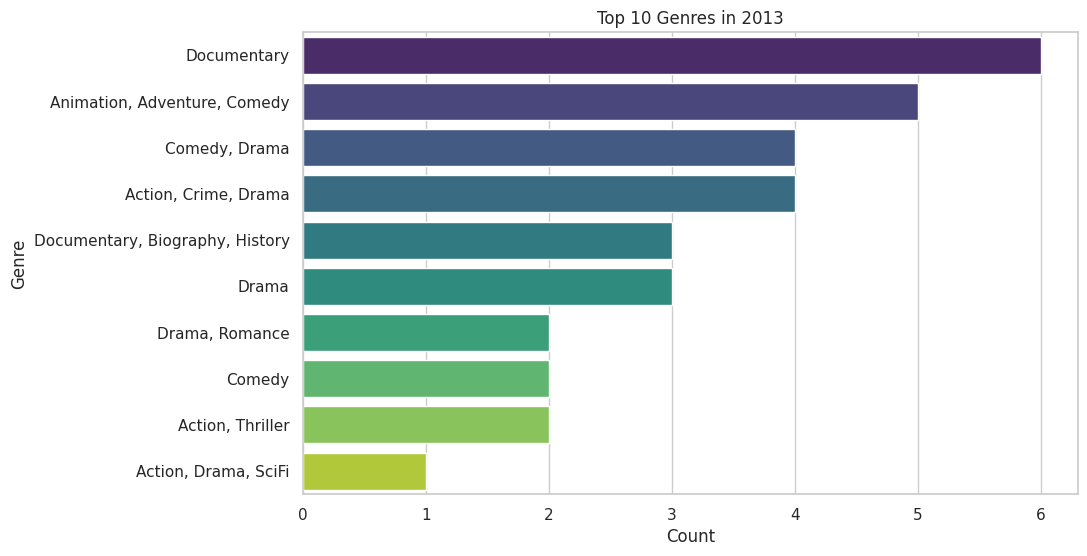

In [63]:
# @title top 10 genre of movie release in 2013

movies_2013 = clean_movie_data[clean_movie_data['Year'] == 2013]
top_10_genres_2013 = movies_2013['Genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres_2013.values, y=top_10_genres_2013.index, palette="viridis")
plt.title('Top 10 Genres in 2013')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

<ipython-input-64-ca2165463dfb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Movies', data=top_10_movies_2013, palette='viridis')


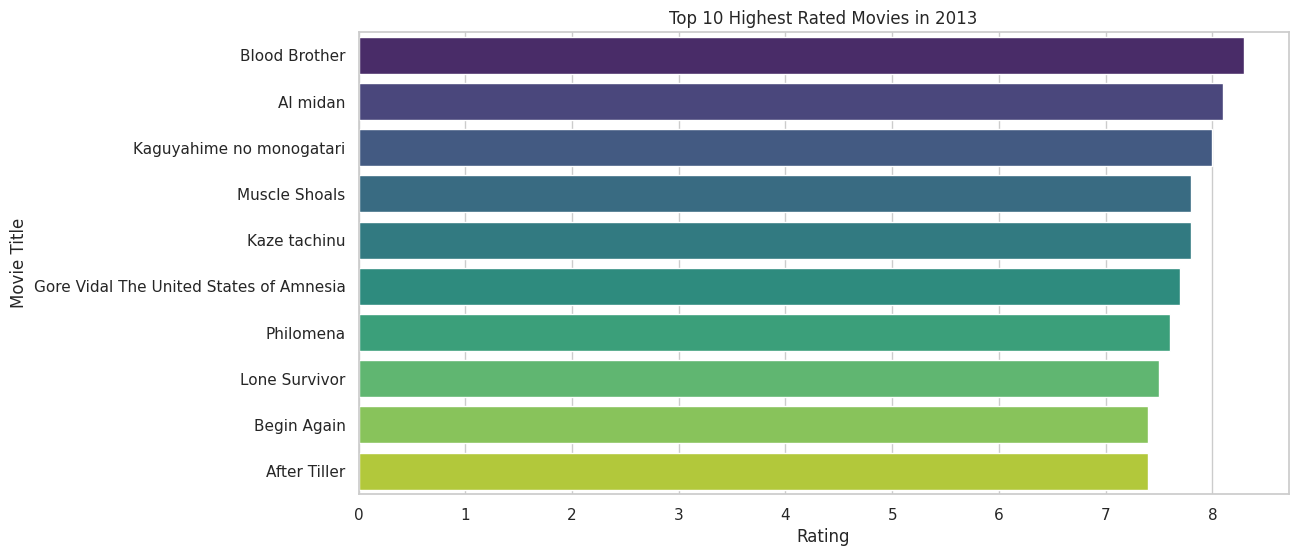

In [64]:
# @title top ten names of movie release in 2013 based on ratings

top_10_movies_2013 = clean_movie_data[clean_movie_data['Year'] == 2013].sort_values('Rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Movies', data=top_10_movies_2013, palette='viridis')
plt.title('Top 10 Highest Rated Movies in 2013')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.show()

<ipython-input-65-e3c0678959c5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Votes', y='Movies', data=top_10_movies_2013, palette='viridis')


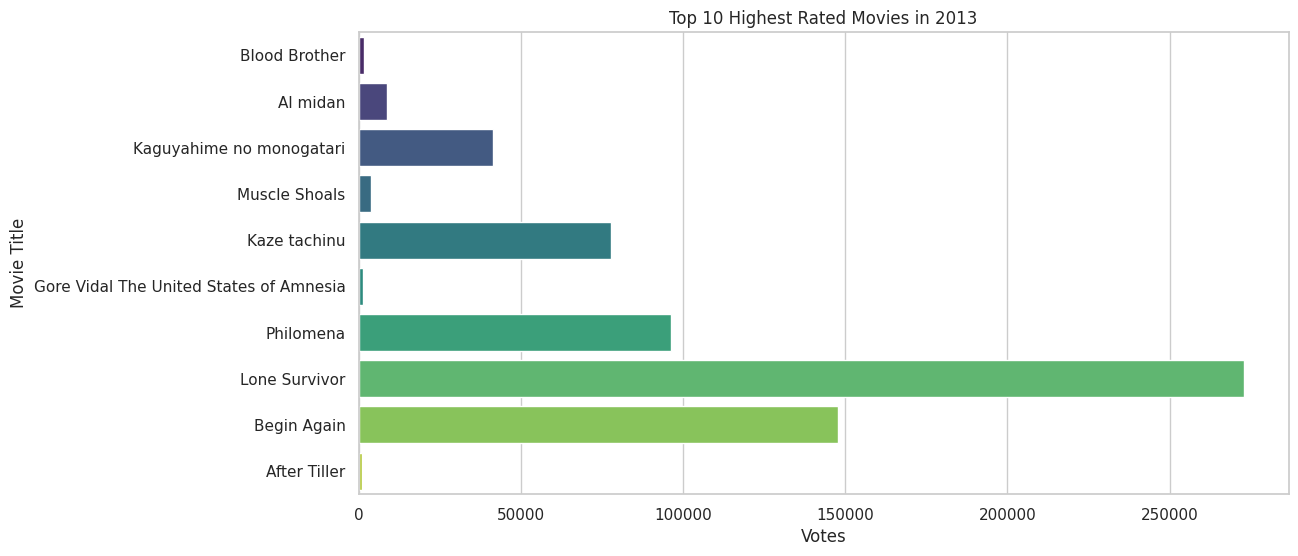

In [65]:
# @title top ten names of movie release in 2013 based on Votes

top_10_movies_2013 = clean_movie_data[clean_movie_data['Year'] == 2013].sort_values('Rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Votes', y='Movies', data=top_10_movies_2013, palette='viridis')
plt.title('Top 10 Highest Rated Movies in 2013')
plt.xlabel('Votes')
plt.ylabel('Movie Title')
plt.show()

<ipython-input-66-6a6bc5efdf5e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gross', y='Movies', data=top_10_gross_movies, palette='viridis')


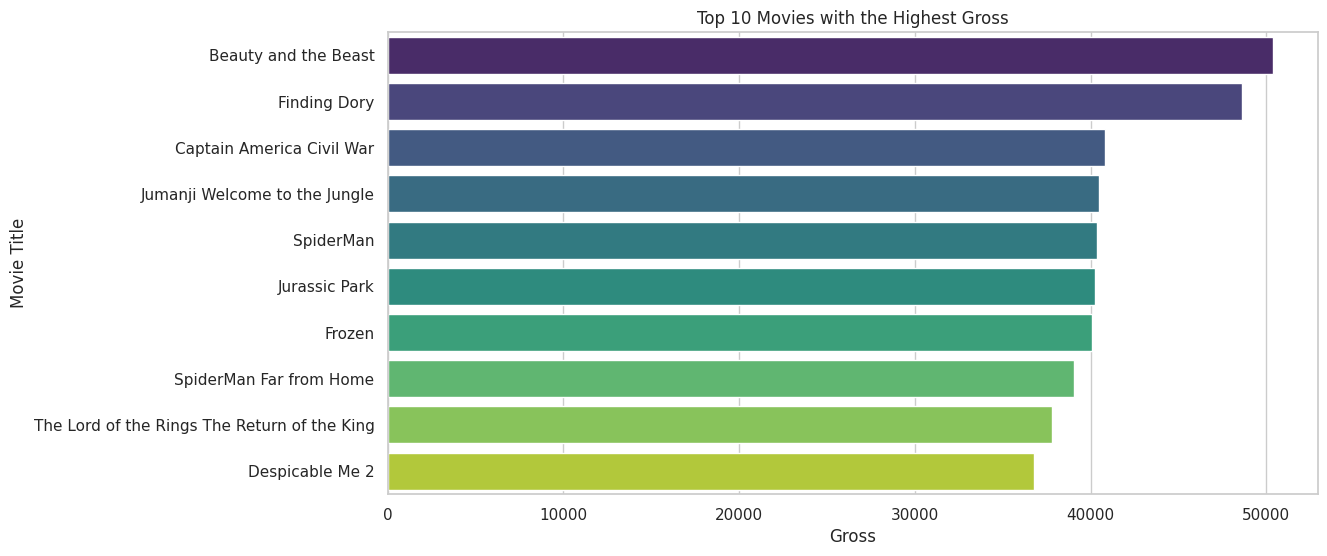

In [66]:
# @title Movie with the highest gross income

# Sort the DataFrame by 'Gross' in descending order and select the top 10 movies
top_10_gross_movies = clean_movie_data.sort_values('Gross', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Gross', y='Movies', data=top_10_gross_movies, palette='viridis')
plt.title('Top 10 Movies with the Highest Gross')
plt.xlabel('Gross')
plt.ylabel('Movie Title')
plt.show()

In [67]:
# @title Genre that Beauty and the beast belong
clean_movie_data[clean_movie_data['Movies'] == 'Beauty and the Beast']['Genre'].values[0]

'Family, Fantasy, Musical'

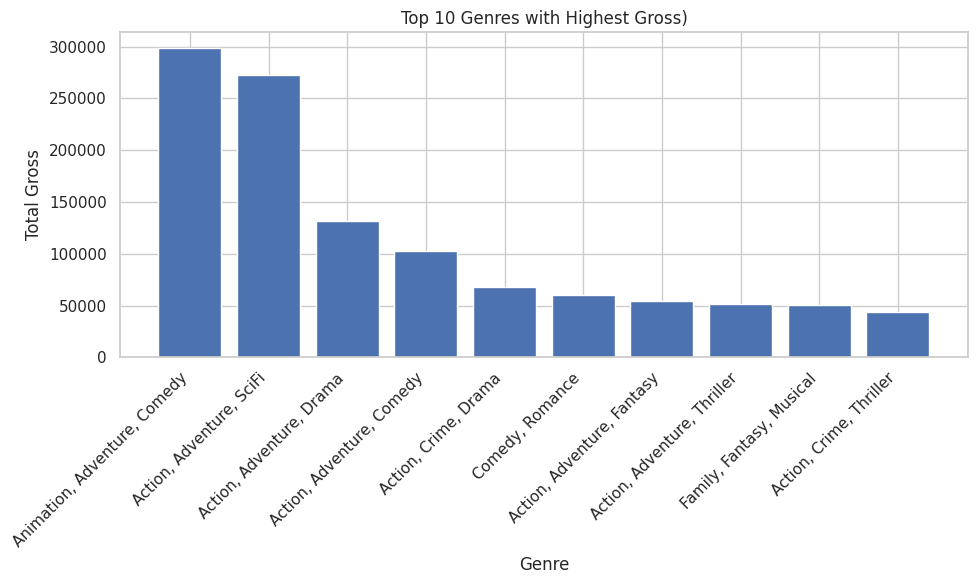

In [68]:
# Group the DataFrame by 'Genre' and calculate the total gross for each genre
genre_gross = clean_movie_data.groupby('Genre')['Gross'].sum() # Capitalize 'Genre'

# Sort the result in descending order and select the top 10 genres
top_10_genres = genre_gross.sort_values(ascending=False).head(10)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(top_10_genres.index, top_10_genres.values)
plt.xlabel('Genre')
plt.ylabel('Total Gross')
plt.title('Top 10 Genres with Highest Gross)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

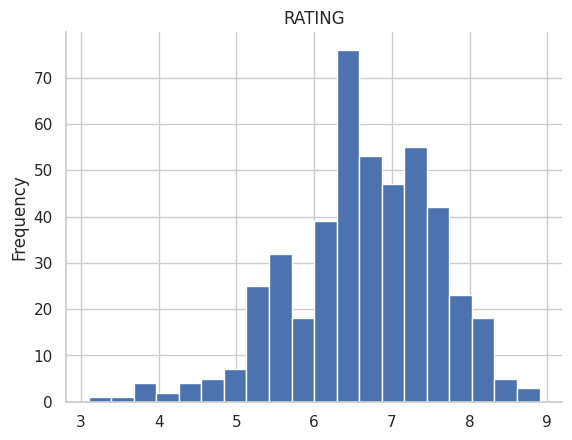

In [69]:
# @title RATING

clean_movie_data['Rating'].plot(kind='hist', bins=20, title='RATING')
plt.gca().spines[['top', 'right',]].set_visible(False)

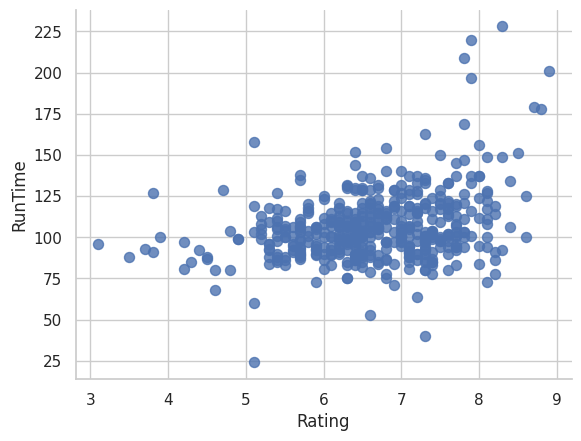

In [70]:
#Rating Vs Runtime
# @title RATING vs RunTime

clean_movie_data.plot(kind='scatter', x='Rating', y='RunTime', s=52, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [71]:
# Sort the DataFrame by 'RunTime' in descending order and select the top row
longest_movie = clean_movie_data.sort_values('RunTime', ascending=False).iloc[0]


# Print the movie title, genre, and rating
print("Movie:", longest_movie['Movies'])
print("Genre:", longest_movie['Genre'])
print("Rating:", longest_movie['Rating'])
print("RunTime:", longest_movie['RunTime'])

Movie: Lawrence of Arabia
Genre: Adventure, Biography, Drama
Rating: 8.3
RunTime: 228.0


##1. Documentaru is the most watch genre in the movies
##2. 2013 is the year that most movies were release.
##3.Beauty and the beast is the movie with the highest gross income
##4.Beauty and the Beast falls under Family, Fantasy, Musical genre